In [15]:
import numpy as np
import matplotlib as mlp
import scipy as sp

In [16]:
#y"+ 1/4*y = 8 -< y'' druga pochodna
#y" + .25*y = 8 w kazdym przedziale x od o do dziesieciu
#y' pierwsza pochodzna 
#y" druga pochodzna 

In [17]:
# y" + .25*y = 8
# { y(0) = 0
# { y(10) = 0

In [18]:
# y"_i = (y_i-1 - 2y_i + y_i+1) / h **2 

In [19]:
# h = x_i+1 - x_1 = 1

In [20]:
# y_8 - 2y_9 + y_10 / h**2 + 1/4 y_9 = 8
# y_1 - 2y_2 + y_3 / h**2 + 1/4 y_2 = 8
# y_0 - 2y_1 + y_2  h**2 + 1/4 y_1 = 8
# y_i + (-2 + 1/2*h**2) * y + y_i+1 = 8h**2



In [21]:
# 1*y_0 + (-2 + 1/2*h**2) * y_1 + 1 * y_2 = 8h**2

In [22]:
matrix = [
    [-1.75,	1,	0,	0,	0,	0,	0,	0,	0],
    [1,	-1.75,	1,	0,	0,	0,	0,	0,	0],
    [0,	1,	-1.75,	1,	0,	0,	0,	0,	0],
    [0,	0,	1,	-1.75,	1,	0,	0,	0,	0],
    [0,	0,	0,	1,	-1.75,	1,	0,	0,	0],
    [0,	0,	0,	0,	1,	-1.75,	1,	0,	0],
    [0,	0,	0,	0,	0,	1,	-1.75,	1,	0],
    [0,	0,	0,	0,	0,	0,	1,	-1.75,	1],
    [0,	0,	0,	0,	0,	0,	0,	1,	-1.75]
]

In [23]:
mtr = np.array(matrix)

In [24]:
mtr

array([[-1.75,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , -1.75,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -1.75,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -1.75,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -1.75,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.75,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.75,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.75,  1.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.75]])

In [43]:
x = [i for i in range(1,10,1)]

In [73]:
x = np.linspace(1,9,9)

In [75]:
xx = np.asarray(x, dtype=float)

In [78]:
if x.ndim != 1:
    raise ValueError("`x` must be 1 dimensional.")

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [69]:
W = sp.integrate.solve_bvp(
    fun, 
    bc,
    mtr,
    x.flatten())

ValueError: `x` must be 1 dimensional.

In [72]:
np.shape(x)

(9,)

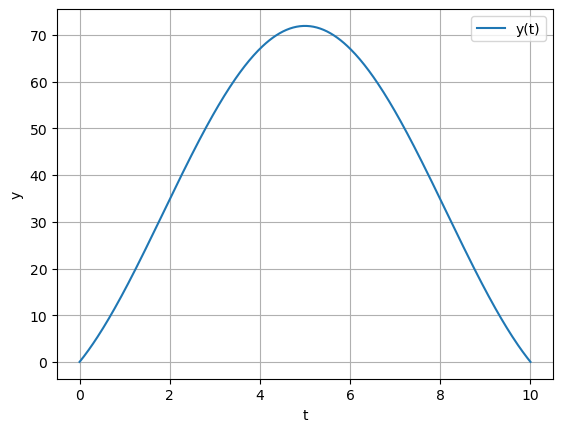

In [81]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Define the ODE system
def ode_system(t, Y):
    y, yp = Y
    return np.vstack((yp, 8 - 0.25*y))

# Boundary conditions
def bc(Ya, Yb):
    return np.array([
        Ya[0],     # y(0) = 0
        Yb[0]      # y(10) = 0
    ])

# Initial mesh
t = np.linspace(0, 10, 20)

# Initial guess for y and y'
Y_guess = np.zeros((2, t.size))

# Solve
sol = solve_bvp(ode_system, bc, t, Y_guess)

# Plot
t_plot = np.linspace(0, 10, 400)
y_plot = sol.sol(t_plot)[0]

plt.plot(t_plot, y_plot, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
